In [ ]:
# Retention Strategy Simulation – Customer Churn

## Objective
Use churn probabilities to simulate retention strategies and estimate
business impact such as:
- Reduced churn
- Revenue saved
- Campaign ROI

This notebook answers:
Who should we target?
What action should we take?
Is it worth the cost?


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")


In [3]:
#Load Model Outputs
RESULTS_PATH = "../data/model_results.csv"

results = pd.read_csv(RESULTS_PATH)
results.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,avg_monthly_spend,early_churn_risk,price_sensitivity,customer_value_score,service_count,gender_Male,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Mid,tenure_group_New,tenure_group_nan,churn_probability,actual_churn
0,0,72,114.05,8468.20,116.002740,0,0.974763,8211.60,8,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.073710,0
1,1,8,100.15,908.55,100.950000,0,0.982344,801.20,5,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.816996,0
2,0,41,78.35,3211.20,76.457143,0,1.011527,3212.35,6,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.233317,0
3,0,18,78.20,1468.75,77.302632,0,0.998689,1407.60,3,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.532386,0
4,0,72,82.65,5919.35,81.086986,0,1.006859,5950.80,7,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.042870,0


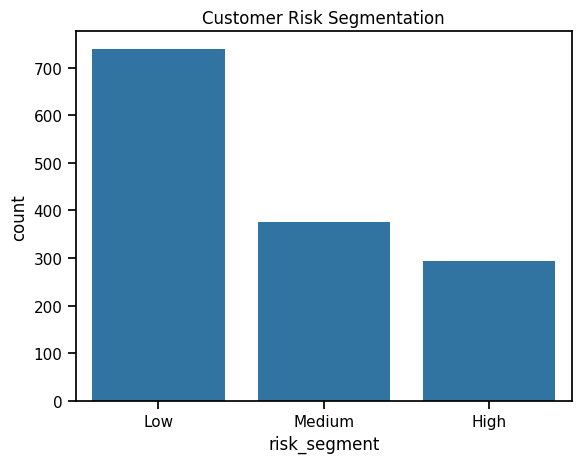

In [4]:
#Risk Segmentation
results["risk_segment"] = pd.cut(
    results["churn_probability"],
    bins=[0, 0.4, 0.7, 1.0],
    labels=["Low", "Medium", "High"]
)

results["risk_segment"].value_counts()
sns.countplot(x="risk_segment", data=results)
plt.title("Customer Risk Segmentation")
plt.show()


In [5]:
# Business assumptions (editable)
AVG_CUSTOMER_VALUE = 5000     # ₹ per customer
RETENTION_OFFER_COST = 500    # ₹ per customer
RETENTION_SUCCESS_RATE = 0.4  # 40% success


In [6]:
#Strategy 1: Target ONLY High-Risk Customers
high_risk = results[results["risk_segment"] == "High"]

targeted_customers = len(high_risk)
expected_saved = int(targeted_customers * RETENTION_SUCCESS_RATE)

revenue_saved = expected_saved * AVG_CUSTOMER_VALUE
campaign_cost = targeted_customers * RETENTION_OFFER_COST

net_gain = revenue_saved - campaign_cost

targeted_customers, revenue_saved, campaign_cost, net_gain


(294, 585000, 147000, 438000)

In [7]:
#Strategy 2: Target High + Medium Risk Customers
high_medium = results[results["risk_segment"].isin(["High", "Medium"])]

targeted_customers_2 = len(high_medium)
expected_saved_2 = int(targeted_customers_2 * RETENTION_SUCCESS_RATE)

revenue_saved_2 = expected_saved_2 * AVG_CUSTOMER_VALUE
campaign_cost_2 = targeted_customers_2 * RETENTION_OFFER_COST

net_gain_2 = revenue_saved_2 - campaign_cost_2

targeted_customers_2, revenue_saved_2, campaign_cost_2, net_gain_2


(670, 1340000, 335000, 1005000)

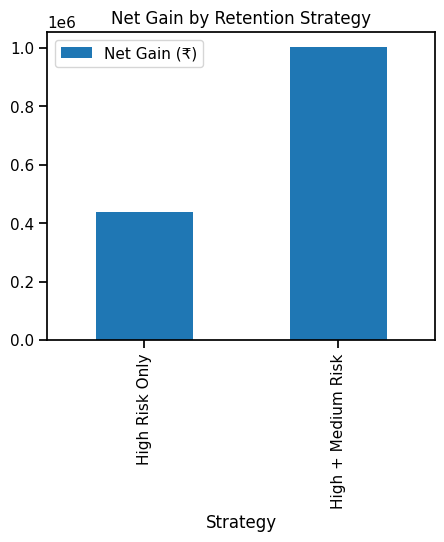

In [8]:
#strategy comparison
strategy_summary = pd.DataFrame({
    "Strategy": ["High Risk Only", "High + Medium Risk"],
    "Targeted Customers": [targeted_customers, targeted_customers_2],
    "Revenue Saved (₹)": [revenue_saved, revenue_saved_2],
    "Campaign Cost (₹)": [campaign_cost, campaign_cost_2],
    "Net Gain (₹)": [net_gain, net_gain_2]
})

strategy_summary
strategy_summary.set_index("Strategy")[["Net Gain (₹)"]].plot(
    kind="bar", figsize=(5,4)
)
plt.title("Net Gain by Retention Strategy")
plt.show()


In [9]:
#KPI Impact Estimation
baseline_churn_rate = results["actual_churn"].mean()
post_retention_churn_rate = (
    (results["actual_churn"].sum() - expected_saved) / len(results)
)

baseline_churn_rate, post_retention_churn_rate
churn_reduction_pct = (
    (baseline_churn_rate - post_retention_churn_rate)
    / baseline_churn_rate
) * 100

churn_reduction_pct


np.float64(31.28342245989305)

In [10]:
#Actionable Retention Recommendations
def recommend_action(row):
    if row["risk_segment"] == "High":
        return "Immediate retention offer + support call"
    elif row["risk_segment"] == "Medium":
        return "Discount or contract upgrade"
    else:
        return "No action required"

results["recommended_action"] = results.apply(recommend_action, axis=1)
results[["churn_probability", "risk_segment", "recommended_action"]].head()


,churn_probability,risk_segment,recommended_action
0,0.073710,Low,No action required
1,0.816996,High,Immediate retention offer + support call
2,0.233317,Low,No action required
3,0.532386,Medium,Discount or contract upgrade
4,0.042870,Low,No action required


In [11]:
#Save Final Retention Output
FINAL_OUTPUT_PATH = "../data/retention_recommendations.csv"
results.to_csv(FINAL_OUTPUT_PATH, index=False)

FINAL_OUTPUT_PATH


'../data/retention_recommendations.csv'